In [2]:
%pylab inline 
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'sgc_run_obiwan_really_masked_chunk21.fits'
dat = fits.getdata(topdir+fn)
r_half_dev = np.zeros(len(dat))
r_half_dev[dat['fracdev']>0.5] = dat[dat['fracdev']>0.5]

Populating the interactive namespace from numpy and matplotlib


(0, 3)

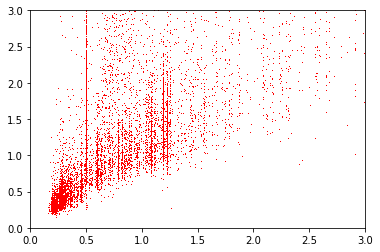

In [3]:

plt.plot(dat[dat['fracdev']>0.5]['sim_rhalf'],dat[dat['fracdev']>0.5]['shapedev_r'],'r,')
plt.gca().set_ylim((0,3))
plt.gca().set_xlim((0,3))

(0, 3)

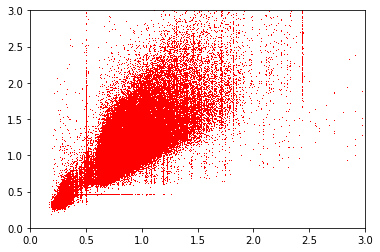

In [4]:
plt.plot(dat[dat['fracdev']<0.5]['sim_rhalf'],dat[dat['fracdev']<0.5]['shapeexp_r'],'r,')
plt.gca().set_ylim((0,3))
plt.gca().set_xlim((0,3))

In [17]:
data = np.vstack((dat[dat['fracdev']>0.5]['sim_rhalf'],dat[dat['fracdev']>0.5]['shapedev_r']))
kde = stats.gaussian_kde(data)

In [19]:
x = np.arange(0,3.0,0.01)
y = np.arange(0,3.0,0.01)
xv, yv = np.meshgrid(x, y)
values = np.vstack((xv.ravel(),yv.ravel()))
density_dev = kde(values)

Text(0.5,1,'dev gal input flux vs output flux density profile')

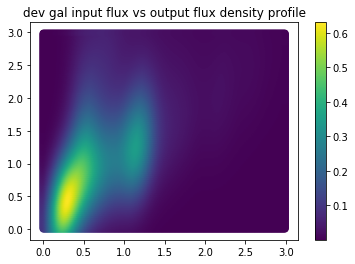

In [20]:
plt.scatter(xv.ravel(),yv.ravel(),c = density_dev)
plt.colorbar()
plt.title('dev gal input flux vs output flux density profile')

In [22]:
data = np.vstack((dat[dat['fracdev']<0.5]['sim_rhalf'],dat[dat['fracdev']<0.5]['shapeexp_r']))
kde = stats.gaussian_kde(data)

x = np.arange(0,3.0,0.025)
y = np.arange(0,3.0,0.025)
xv, yv = np.meshgrid(x, y)
values = np.vstack((xv.ravel(),yv.ravel()))
density_exp = kde(values)

Text(0.5,1,'exp gal input flux vs output flux density profile')

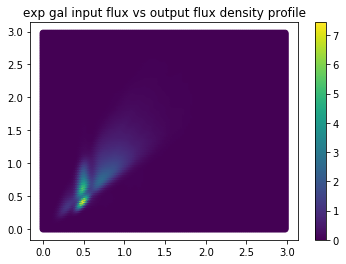

In [23]:
plt.scatter(xv.ravel(),yv.ravel(),c = density_exp)
plt.colorbar()
plt.title('exp gal input flux vs output flux density profile')

In [65]:
x_dev = np.arange(0,3.0,0.01)
y_dev = np.arange(0,3.0,0.01)
xv, yv = np.meshgrid(x_dev, y_dev)
x_mean_list = np.zeros(len(x_dev))
for i in range(len(y_dev)):
    xv_i = xv.ravel()[yv.ravel()==y_dev[i]]*density_dev[yv.ravel()==y_dev[i]]
    x_mean_list[i] = xv_i.sum()/(density_dev[yv.ravel()==y_dev[i]].sum())

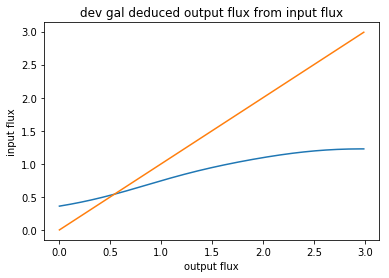

In [69]:
plt.plot(y_dev,x_mean_list)
plt.title('dev gal deduced output flux from input flux')
plt.xlabel('output flux')
plt.ylabel('input flux')
plt.plot(x_dev,y_dev)

In [68]:
from scipy.interpolate import interp1d
f_dev = interp1d(y_dev, x_mean_list, kind='cubic')
f_dev(0.5)

array(0.5236728358085916)

In [71]:
x_exp = np.arange(0,3.0,0.025)
y_exp = np.arange(0,3.0,0.025)
xv, yv = np.meshgrid(x_exp, x_exp)
x_mean_list = np.zeros(len(x_exp))
x_std_list = np.zeros(len(x_exp))
for i in range(len(y_exp)):
    xv_i = xv.ravel()[yv.ravel()==y_exp[i]]*density_exp[yv.ravel()==y_exp[i]]
    x_mean_list[i] = xv_i.sum()/(density_exp[yv.ravel()==y_exp[i]].sum())
    std_i = (xv_i/(density_exp[yv.ravel()==y_exp[i]].sum())*len(xv_i)).std()
    x_std_list[i] = std_i

Text(0,0.5,'input flux')

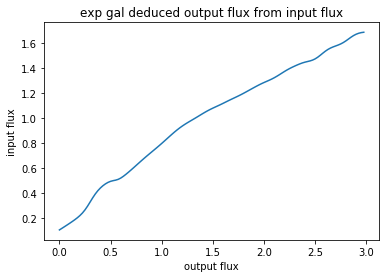

In [72]:
plt.plot(y_exp,x_mean_list)
#plt.errorbar(y_exp,x_mean_list,x_std_list)
plt.title('exp gal deduced output flux from input flux')
plt.xlabel('output flux')
plt.ylabel('input flux')
#plt.plot(x_dev,y_dev)

In [74]:
f_exp = interp1d(y_exp, x_mean_list, kind='cubic')
f_exp(0.5)

array(0.493081658939146)

In [128]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
dat = fits.getdata(topdir+'sample_dr3_elg_like.fits')

In [129]:
r_half = np.zeros(len(dat))
dat_sel = dat[dat['r_half']<2.97]
r_half = np.zeros(len(dat_sel))

In [130]:
r_half[dat_sel['n']==1] = f_exp(dat_sel[dat_sel['n']==1]['r_half'])

In [131]:
r_half[dat_sel['n']==4] = f_dev(dat_sel[dat_sel['n']==4]['r_half'])

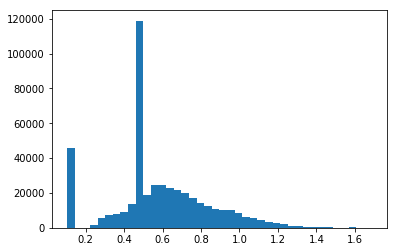

In [132]:
p=plt.hist(r_half,bins=40)

In [133]:
from astropy.table import Table
tab = Table(dat_sel)

In [134]:
tab['r_half'] = r_half

In [135]:
tab.write(topdir+'sample_dr3_elg_like_updated.fits',overwrite=True)

In [121]:
dat_sel.columns

ColDefs(
    name = 'g'; format = 'D'
    name = 'r'; format = 'D'
    name = 'z'; format = 'D'
    name = 'r_half'; format = 'D'
    name = 'n'; format = 'I'
    name = 'id_sample'; format = '20A'
)

In [127]:
dat['id_sample']

chararray(['325875-6545', '325875-7132', '321555-95', ..., '341887-5653',
           '341887-5666', '341887-5690'],
          dtype='<U20')

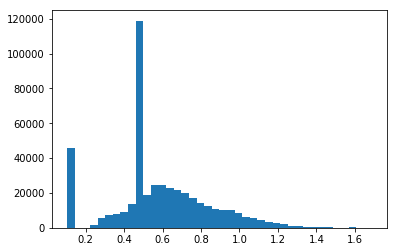

In [137]:
p=plt.hist(tab['r_half'],bins=40)